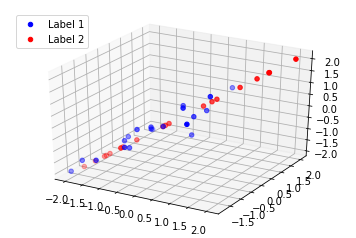

[ -1.93893325e+16 +0.00000000e+00j  -4.13641451e+15 +0.00000000e+00j
   1.00698068e+15 +2.43098607e+15j   1.00698068e+15 -2.43098607e+15j
   1.74678860e+15 +0.00000000e+00j  -1.15256006e+15 +0.00000000e+00j
  -6.60307172e+14 +1.60003491e+14j  -6.60307172e+14 -1.60003491e+14j
  -6.63624284e+14 +0.00000000e+00j  -5.16847970e+14 +0.00000000e+00j
   8.57295130e+14 +0.00000000e+00j   4.24944867e+14 +0.00000000e+00j
   5.34902923e+14 +0.00000000e+00j   5.64039863e+14 +0.00000000e+00j
  -1.11385975e-01 +4.79346082e-01j  -1.11385975e-01 -4.79346082e-01j
   1.23863403e+00 +0.00000000e+00j   3.60750810e-01 +0.00000000e+00j
   5.64205734e-01 +1.41143183e-01j   5.64205734e-01 -1.41143183e-01j]
(1.74678860127e+15+0j)
4


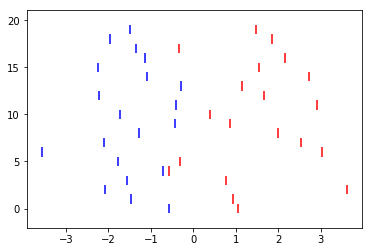

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Projects vector 'b' onto vector 'a'
def proj(b, a):
    return (np.dot(a, b) / np.linalg.norm(a) ** 2) * a

# Take samples for Label 1
mean1 = np.array([0,0,0])
cov1 = ((1,.9,.9), (.9,1,.9), (.9,.9,1))
s1 = multivariate_normal(mean1, cov1, 20)

# Take samples for Label 2
mean2 = np.array([0,0,1])
cov2 = ((1,.8,.8), (.8,1,.8), (.8,.8,1))
s2 = multivariate_normal(mean2, cov2, 20)

''' Part 1 '''
# Scatter both data sets on a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s1[:,0], s1[:,1], s1[:,2], c = 'b', label = 'Label 1')
ax.scatter(s2[:,0], s2[:,0], s2[:,0], c = 'r', label = 'Label 2')
ax.legend(loc='upper left')
plt.show()

''' Part 2 '''
# Calculate between variance
btwnVar = np.dot((mean2 - mean1), (mean2 - mean1).transpose())

# Calculate within variances
within1 = np.dot((s1 - mean1), (s1 - mean1).transpose())
within2 = np.dot((s2 - mean2), (s2 - mean2).transpose())
withinVar = within1 + within2

# Find w* by finding leading eigenvector of S_w_inv * S_B??????
new_matrix = np.linalg.inv(withinVar) # Perform svd on this and THEN find the eigen values/vectors??? (According to TA)
eig_vals, eig_vecs = np.linalg.eig(new_matrix) # I'm just trying to find eigens directly though. Not sure if it will work
print eig_vals
print np.amax(eig_vals)
print np.ndarray.tolist(eig_vals).index(np.amax(eig_vals))

''' Part 3 - Perform LDA using sklearn '''
labels = []
data = []
for k in range(40):
    if k < 20:
        labels.append(1)
        data.append(s1[k])
    else:
        labels.append(2)
        data.append(s2[k - 20])
data = np.asmatrix(data)

# Train and fit the model, then transform the data
clf = LDA()
LDA(solver='svd', shrinkage='auto', tol=0.05)
clf.fit(data, labels)
s1_new = clf.transform(s1)
s2_new = clf.transform(s2)

# Plot the results
plt.eventplot(s1_new, orientation='horizontal', colors='b')
plt.eventplot(s2_new, orientation='horizontal', colors='r')
plt.show()